In [ ]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

style.use('seaborn-whitegrid')

In [12]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('final_data_set.csv'')

In [4]:
df = df.drop('Unnamed: 0', axis=1)

In [5]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15',
       'walk_score', 'transit_score', 'pers_crime_score', 'prop_crime_score',
       'income', 'renovated_yrs_ago', 'log_price'],
      dtype='object')

In [6]:
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15',
       'walk_score', 'transit_score', 'pers_crime_score', 'prop_crime_score',
       'income', 'renovated_yrs_ago']]

y = pd.DataFrame(df['log_price'])

In [7]:
colnames = df.columns

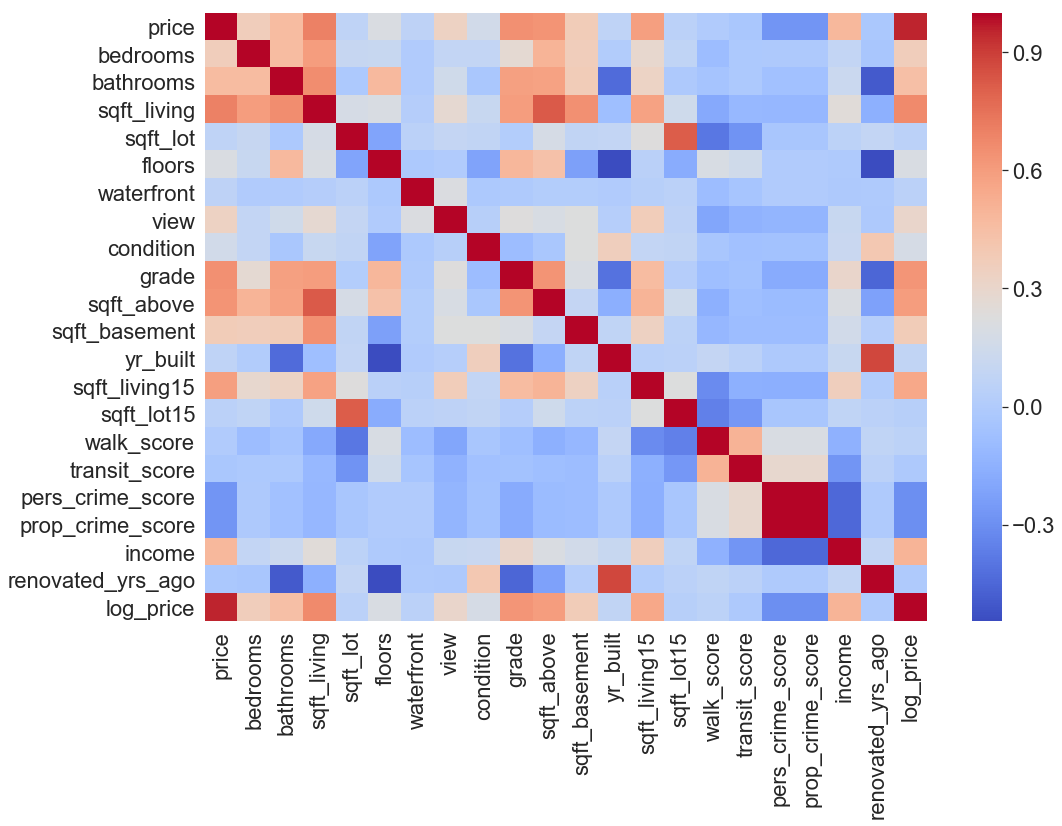

In [8]:
sns.set_context('talk')
sns.set(font_scale=2.0)
# plt.figure(figsize=(12,12))
fig, ax = plt.subplots(figsize=(16,12))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.tight_layout()
# fig.savefig('plots/heatmap3.jpg', dpi=300)

In [9]:
# Cross validate with train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

In [10]:
# scikit learn requires the inputs to be in this shape
# X_train = X_train.values.reshape((len(X_train),1));
y_train = y_train.values.reshape((len(y_train),));
# X_test = X_test.values.reshape((len(X_test),1));
y_test = y_test.values.reshape((len(y_test),));

In [88]:
# First, let's get a look at our plain vanilla, "baseline" model.
lm = LinearRegression()
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

# Get R-Squared for predictions
print(lm.score(X_test, y_test))

0.7416935756485534


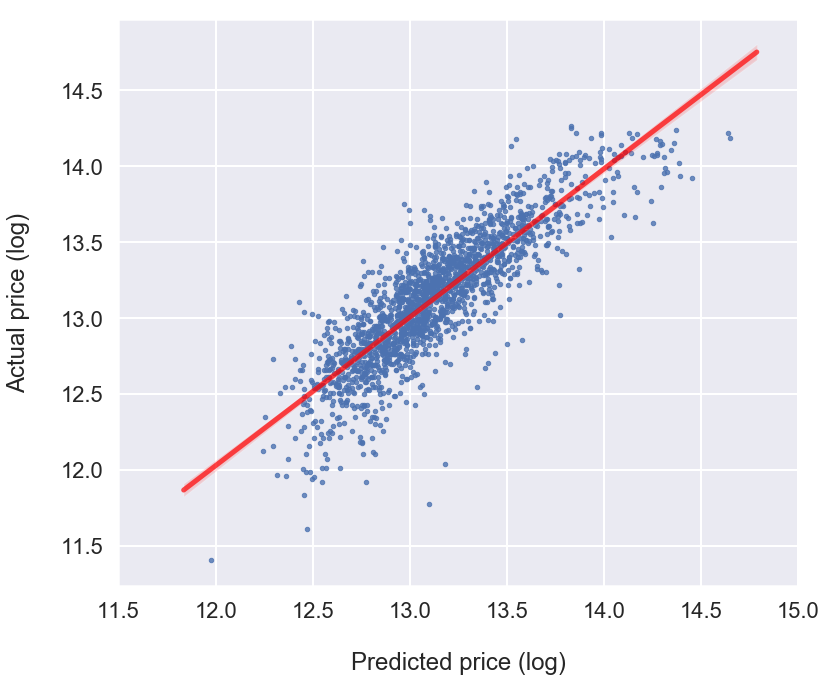

In [14]:
# Plot the linear regression
sns.set_context('poster')
# fig = plt.figure(figsize=(12,12))
fig, ax = plt.subplots(figsize=(12,10))
sns.regplot(predictions, y_test, line_kws={"color":"red","alpha":0.7,"lw":5}, scatter_kws={'alpha': 0.8, 's': 20}, ax=ax)
ax.set_xlabel('Predicted price (log)', labelpad=30)
ax.set_ylabel('Actual price (log)', labelpad=30)
ax.set_xlim(11.5,15)
plt.tight_layout()
# fig.savefig('plots/regplot-2.jpg')

In [19]:
ylabels2 = ['', '$200k', '$400k', '$600k', '$800k', '$1.0m', '$1.2m', '$1.4m', '$1.6m']

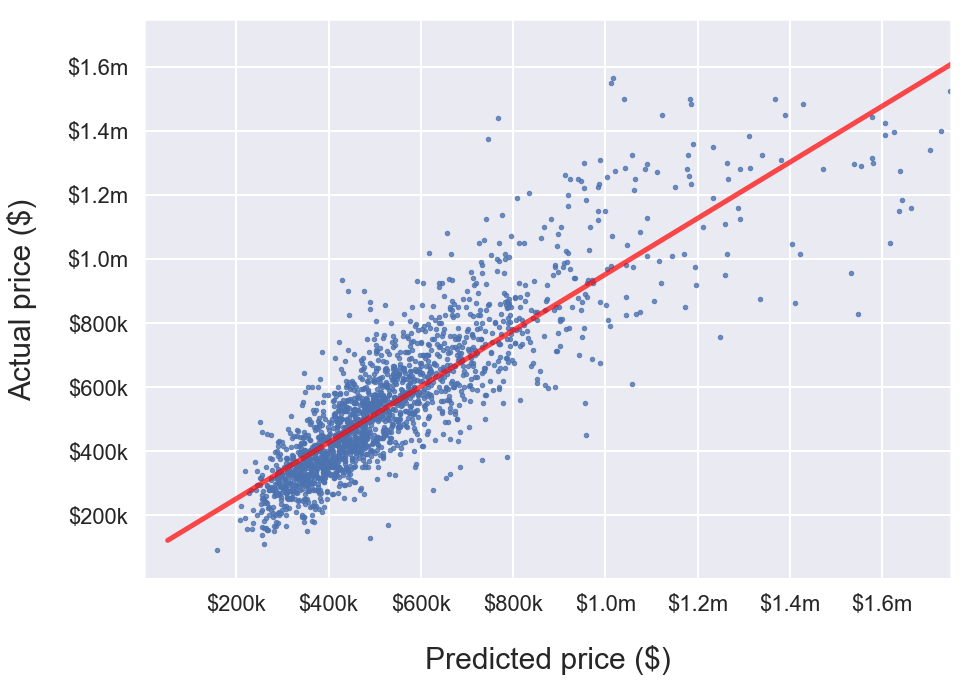

In [20]:
# Plot the actual (non-log) values
sns.set_context('poster')
# fig = plt.figure(figsize=(12,10))
fig, ax = plt.subplots(figsize=(14,10))
sns.regplot(x=np.exp(predictions), y=np.exp(y_test), line_kws={"color":"red","alpha":0.7,"lw":5}, ci=0, scatter_kws={'alpha': 0.8, 's': 20}, ax=ax)
ax.set_xlabel('Predicted price ($)', labelpad=30, fontsize=30)
ax.set_ylabel('Actual price ($)', labelpad=30, fontsize=30)
ax.set_ylim([0,1750000])
ax.set_xlim([0,1750000])
ax.set_yticklabels(ylabels2)
ax.set_xticklabels(ylabels2)
plt.tight_layout()
# plt.savefig('plots/replot-2.jpg')

In [186]:
np.mean(y_test)

13.132759209825458

In [190]:
residuals = y_test - np.mean(y_test)

In [193]:
resids = np.exp(predictions) - np.mean(np.exp(predictions))

In [118]:
feat = list(zip(X.columns, lm.coef_*100))
feat = pd.DataFrame(feat, columns=['Feature', 'Coefficient'])

In [119]:
feat.sort_values('Coefficient')

,Feature,Coefficient
16,pers_crime_score,-3.206993
17,prop_crime_score,-3.206993
4,floors,-0.931618
19,renovated_yrs_ago,-0.068734
13,sqft_lot15,-0.000164
3,sqft_lot,0.000164
18,income,0.000374
10,sqft_basement,0.002811
9,sqft_above,0.009696
2,sqft_living,0.012506


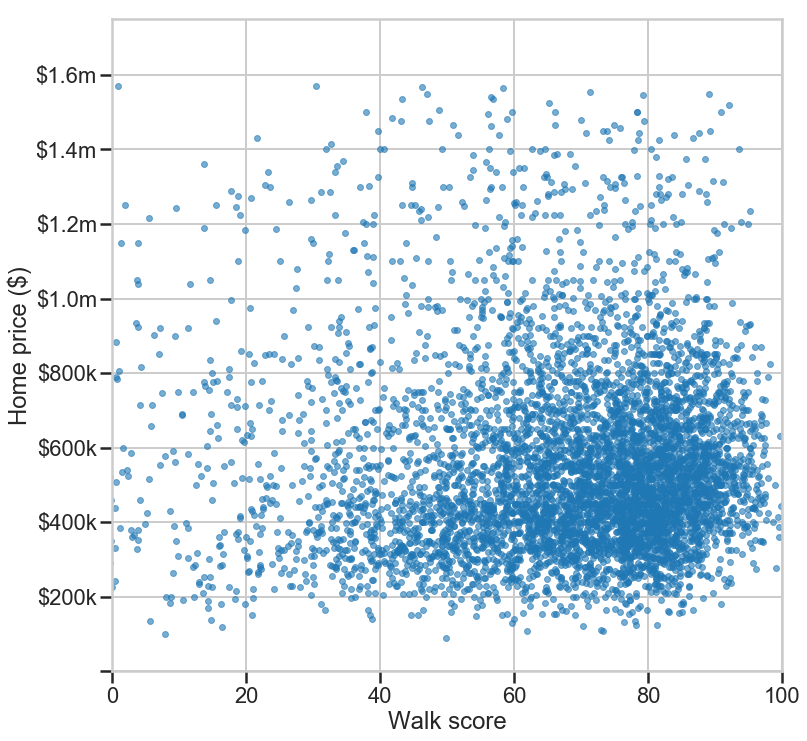

In [178]:
fig, ax = plt.subplots(figsize=(12,12))
sns.regplot(x='walk_score', y='price', data=df, scatter_kws={'alpha': 0.6, 's': 35}, fit_reg=False, x_jitter=True, y_jitter=True)
ax.set_xlabel('Walk score')
ax.set_ylabel('Home price ($)')
ax.set_ylim([0,1750000])
ax.set_xlim([0,100])
ax.set_yticklabels(ylabels2);
# plt.savefig('plots/walk_score_and_home_price.jpg')

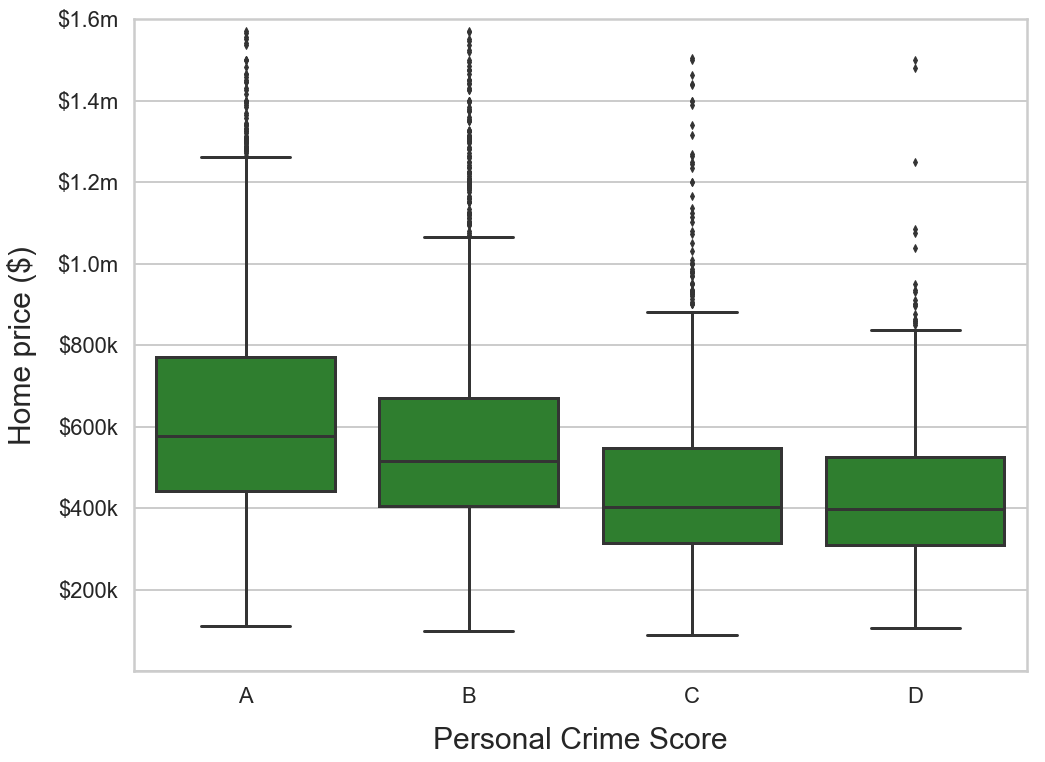

In [372]:
fig, ax = plt.subplots(figsize=(16,12))
sns.boxplot(x='pers_crime_score', y='price', data=df, ax=ax, color='forestgreen')
ax.set_xlabel('Personal Crime Score', labelpad=20, fontsize=30)
ax.set_ylabel('Home price ($)', labelpad=20, fontsize=30)
ax.set_ylim([0,1600000])
# ax.set_xlim([0,100])
ax.set_xticklabels(['A', 'B', 'C', 'D'])
ax.set_yticklabels(ylabels2);
# plt.savefig('plots/pers_crime_score.jpeg')

In [241]:
resid = y_test - predictions

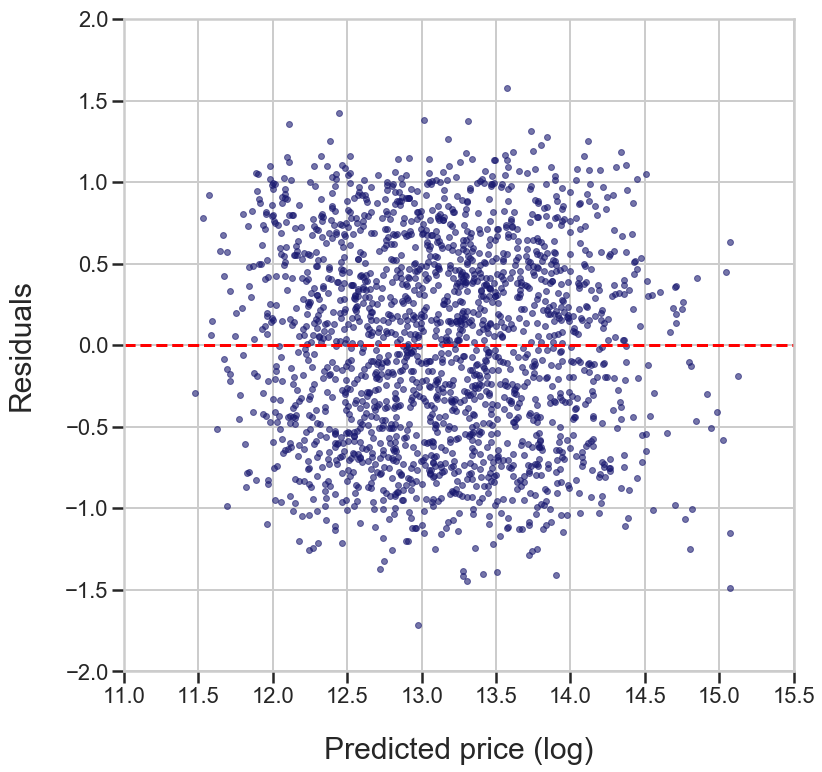

In [283]:
fig, ax = plt.subplots(figsize=(12,12))
sns.regplot(x=predictions, y=resid, scatter_kws={'alpha': 0.6, 's': 35, 'color': 'midnightblue'}, fit_reg=False, x_jitter=True, y_jitter=True)
ax.set_xlabel('Predicted price (log)', labelpad=30, fontsize=30)
ax.set_ylabel('Residuals', labelpad=30, fontsize=30)
plt.axhline(y=0.0, color='r', linestyle='--')
ax.set_ylim([-2,2])
ax.set_xlim([11,15.5])
# ax.set_yticklabels(ylabels2);
# plt.savefig('plots/residuals.jpg')

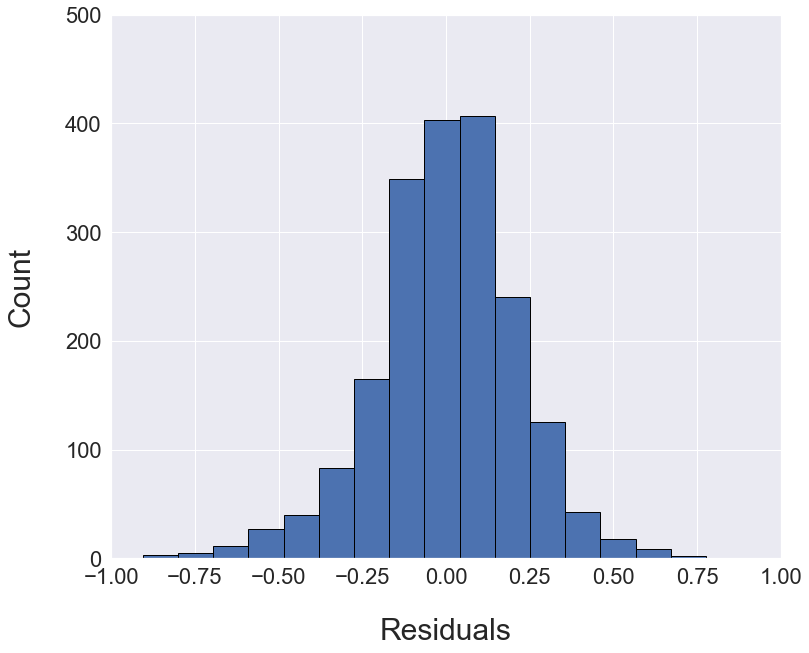

In [339]:
plt.style('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(12,10))
ax.set_xlim([-1,1])
# sns.distplot(df3['log_price'], bins=30, ax=ax, axlabel=r'Home price (log)')
# ax.set(xlabel='Home price', ylabel='Number of homes')
ax.set_ylim([0,500])
ax.set_xlabel(xlabel='Residuals', labelpad=30, fontsize=30)
ax.set_ylabel(ylabel='Count', labelpad=30, fontsize=30)
# ax.set_xticklabels(xlabels2)
plt.hist(resid, bins=20, edgecolor='black', cumulative=False);
plt.savefig('plots/residuals_histogram')

In [310]:
# Load from my model
with open('backups/estimator.pkl', 'rb') as f:
    est = pickle.load(f)

with open('backups/y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)
    
with open('backups/predictions.pkl', 'rb') as f:
    predictions = pickle.load(f)

In [316]:
exp_predict = np.exp(predictions)
exp_ytest = np.exp(y_test)

/Users/brenner/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


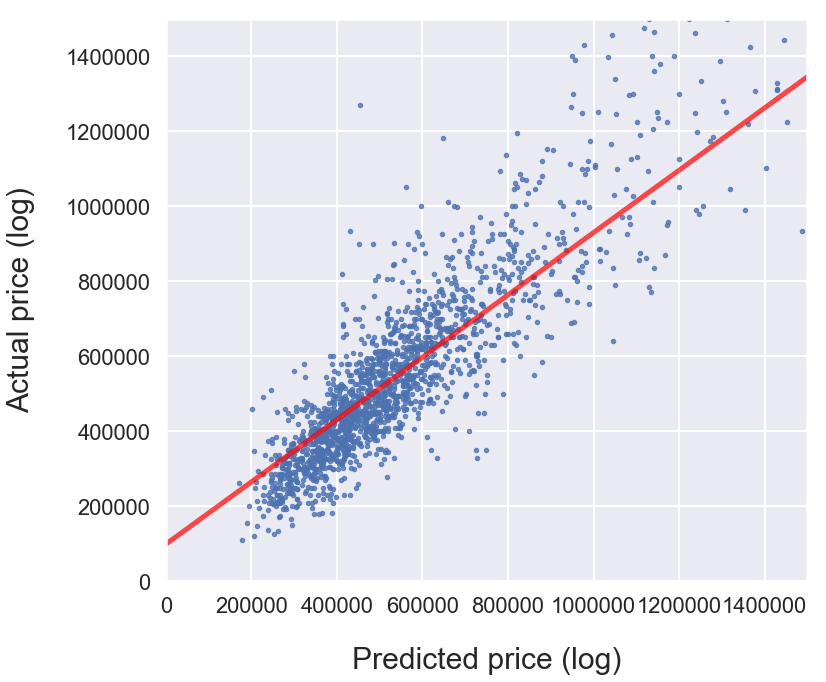

In [359]:
# Plot the linear regression
sns.set_context('poster')
# fig = plt.figure(figsize=(12,12))
fig, ax = plt.subplots(figsize=(12,10))
sns.regplot(x=exp_predict, y=exp_ytest, line_kws={"color":"red","alpha":.7,"lw":5}, ci=0, scatter_kws={'alpha': 0.8, 's': 20}, ax=ax)
ax.set_xlabel('Predicted price ($)', labelpad=30, fontsize=30)
ax.set_ylabel('Actual price ($)', labelpad=30, fontsize=30)
ax.set_xlim(0,1500000)
ax.set_ylim(0,1500000)
plt.tight_layout()
# fig.savefig('plots/final_predicted_vs_ytest.jpg')

/Users/brenner/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


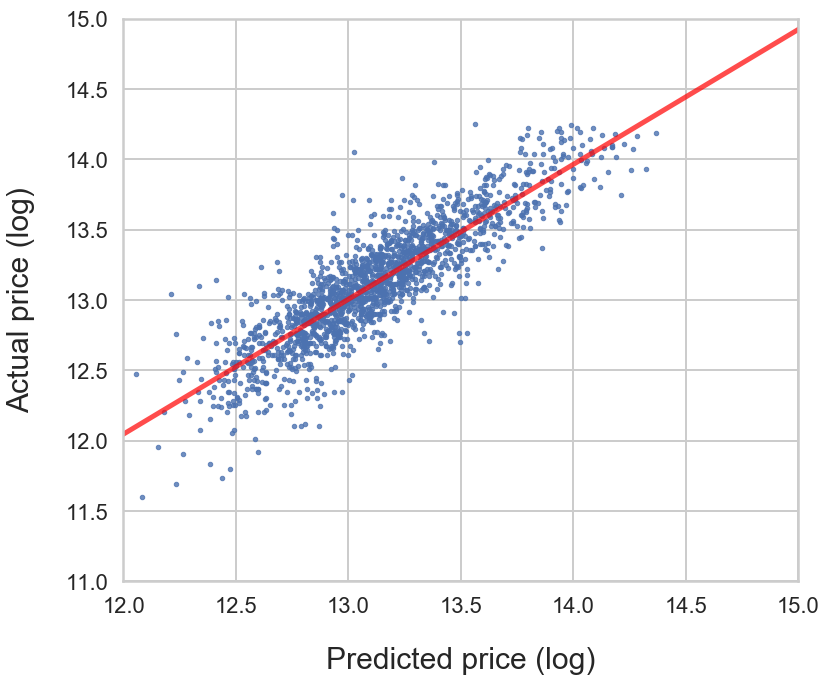

In [392]:
# Plot the linear regression
sns.set_context('poster')
# fig = plt.figure(figsize=(12,12))
fig, ax = plt.subplots(figsize=(12,10))
sns.regplot(x=predictions, y=y_test, line_kws={"color":"red","alpha":0.7,"lw":5}, ci=0, scatter_kws={'alpha': 0.8, 's': 20}, ax=ax)
ax.set_xlabel('Predicted price (log)', labelpad=30, fontsize=30)
ax.set_ylabel('Actual price (log)', labelpad=30, fontsize=30)
ax.set_xlim(12,15)
ax.set_ylim(11,15)
plt.tight_layout()
# fig.savefig('plots/final_predicted_vs_ytest2.jpg', dpi=300)

/Users/brenner/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


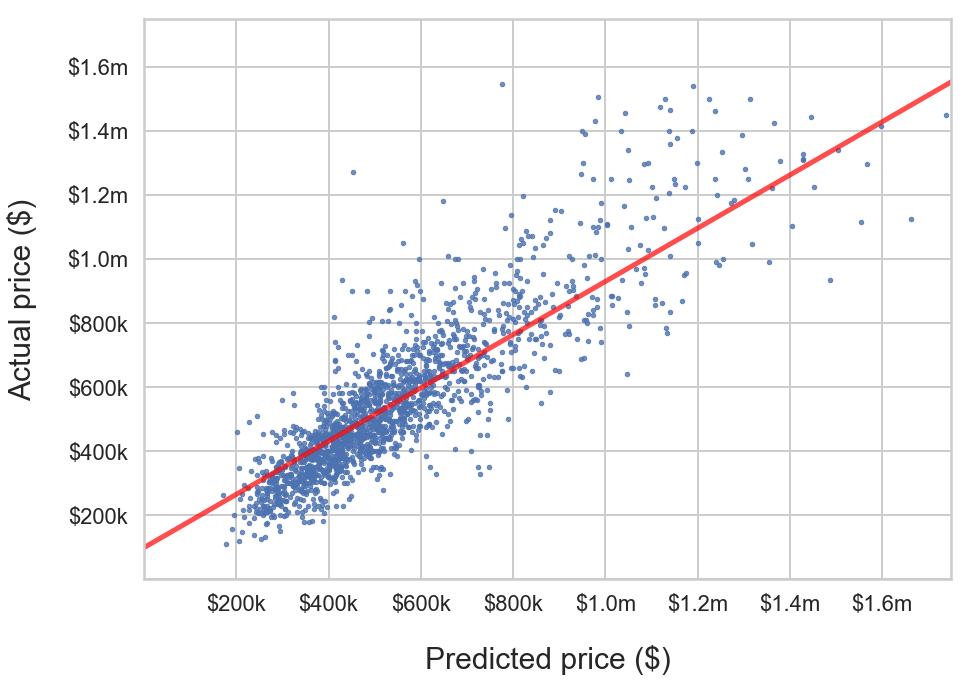

In [366]:
# Plot the actual (non-log) values
sns.set_style('whitegrid')
sns.set_context('poster')
# fig = plt.figure(figsize=(12,10))
fig, ax = plt.subplots(figsize=(14,10))
sns.regplot(x=exp_predict, y=exp_ytest, line_kws={"color":"red","alpha":0.7,"lw":5}, ci=0, scatter_kws={'alpha': 0.8, 's': 20}, ax=ax)
ax.set_xlabel('Predicted price ($)', labelpad=30, fontsize=30)
ax.set_ylabel('Actual price ($)', labelpad=30, fontsize=30)
ax.set_ylim([0,1750000])
ax.set_xlim([0,1750000])
ax.set_yticklabels(ylabels2)
ax.set_xticklabels(ylabels2)
plt.tight_layout()
plt.savefig('plots/final_pred_vs_ytest_dollars.jpg', dpi=300)

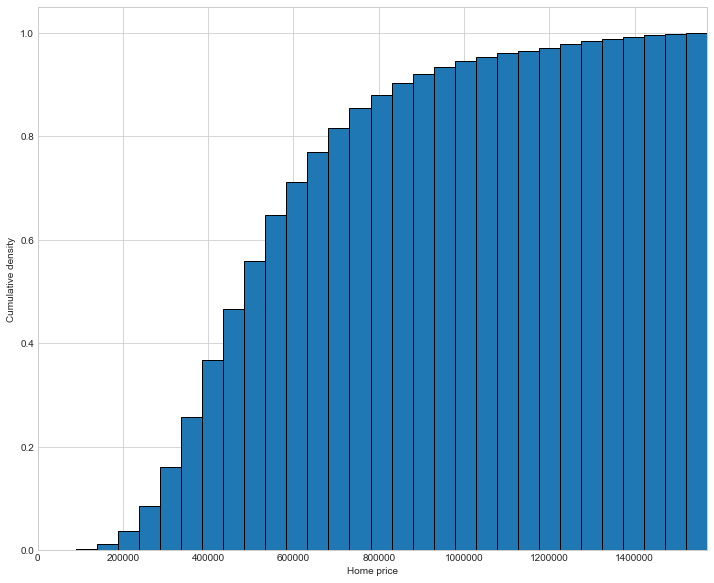

In [21]:
# plt.style('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(12,10))
# ax.set_xlim([0,2000000])
# sns.distplot(df3['log_price'], bins=30, ax=ax, axlabel=r'Home price (log)')
ax.set(xlabel='Home price', ylabel='Cumulative density')
# ax.set_ylim([0.0,1.0])
ax.set_xlim([0,1570000])
plt.hist(df3['price'], bins=30, edgecolor='black', cumulative=True, density=True);

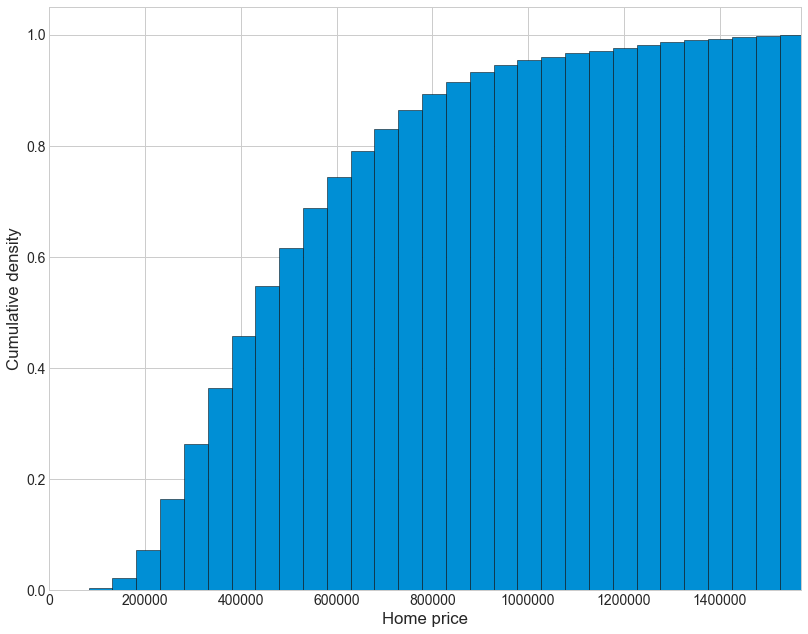

In [157]:
# plt.style('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(12,10))
# ax.set_xlim([0,2000000])
# sns.distplot(df3['log_price'], bins=30, ax=ax, axlabel=r'Home price (log)')
ax.set(xlabel='Home price', ylabel='Cumulative density')
# ax.set_ylim([0.0,1.0])
ax.set_xlim([0,1570000])
plt.hist(df3['price'], bins=30, edgecolor='black', cumulative=True, density=True);

In [315]:
labels = list(range(0, 700, 100))

In [296]:
xlabels2 = ['', '$200k', '$400k', '$600k', '$800k', '$1.0m', '$1.2m', '$1.4m', '$1.6m']

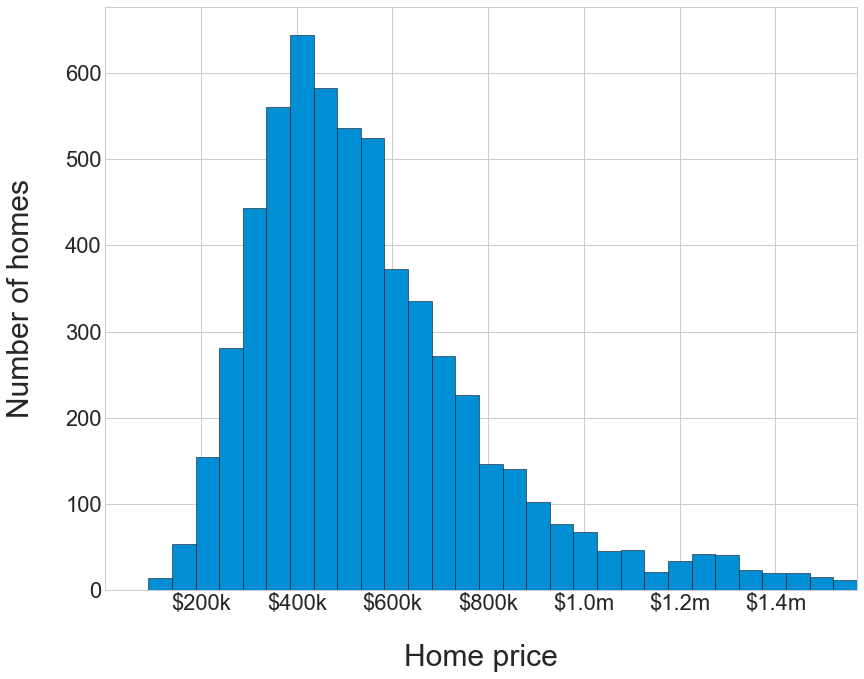

In [345]:
# plt.style('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(12,10))
# ax.set_xlim([0,2000000])
# sns.distplot(df3['log_price'], bins=30, ax=ax, axlabel=r'Home price (log)')
# ax.set(xlabel='Home price', ylabel='Number of homes')
ax.set_xlim([0,1570000])
ax.set_xlabel(xlabel='Home price', labelpad=30, fontsize=30)
ax.set_ylabel(ylabel='Number of homes', labelpad=30, fontsize=30)
ax.set_xticklabels(xlabels2, fontsize=22)
ax.set_yticklabels(labels, fontsize=22)
plt.hist(df3['price'], bins=30, edgecolor='black', cumulative=False);
plt.savefig('hist.jpg', dpi=300)

In [332]:
ylabels2 = list(range(0,900,100))

In [335]:
ylabels2[0] = ''

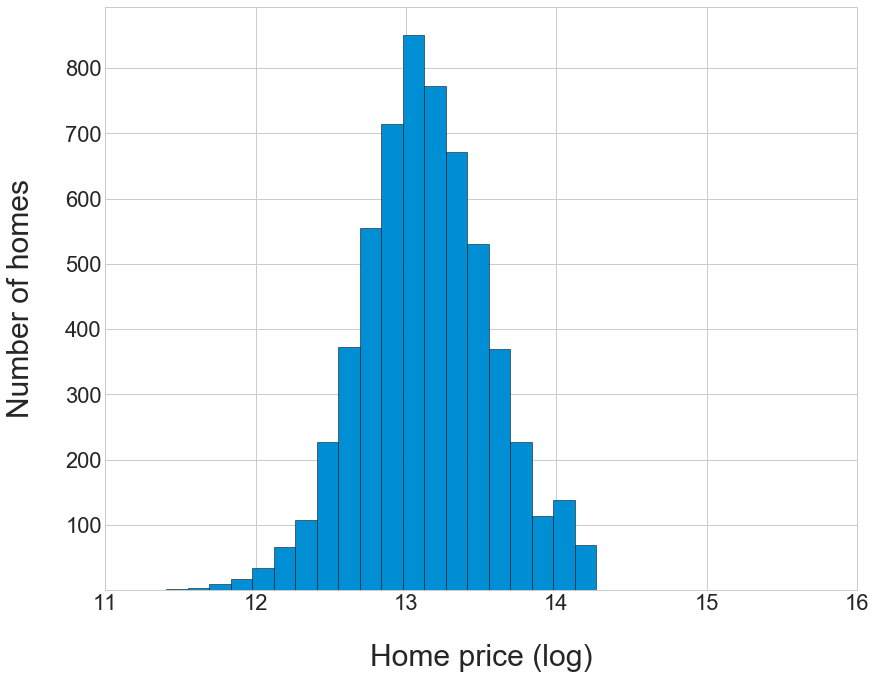

In [347]:
# plt.style('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(12,10))
# ax.set_xlim([0,2000000])
# sns.distplot(df3['log_price'], bins=30, ax=ax, axlabel=r'Home price (log)')
# ax.set(xlabel='Home price', ylabel='Number of homes')
ax.set_xlim([11,16])
ax.set_xlabel(xlabel='Home price (log)', labelpad=30, fontsize=30)
ax.set_ylabel(ylabel='Number of homes', labelpad=30, fontsize=30)
ax.set_xticklabels([11,12,13,14,15,16], fontsize=22)
ax.set_yticklabels(ylabels2, fontsize=22)
plt.hist(df3['log_price'], bins=20, edgecolor='black', cumulative=False);
plt.savefig('log_price_histogram', dpi=300)

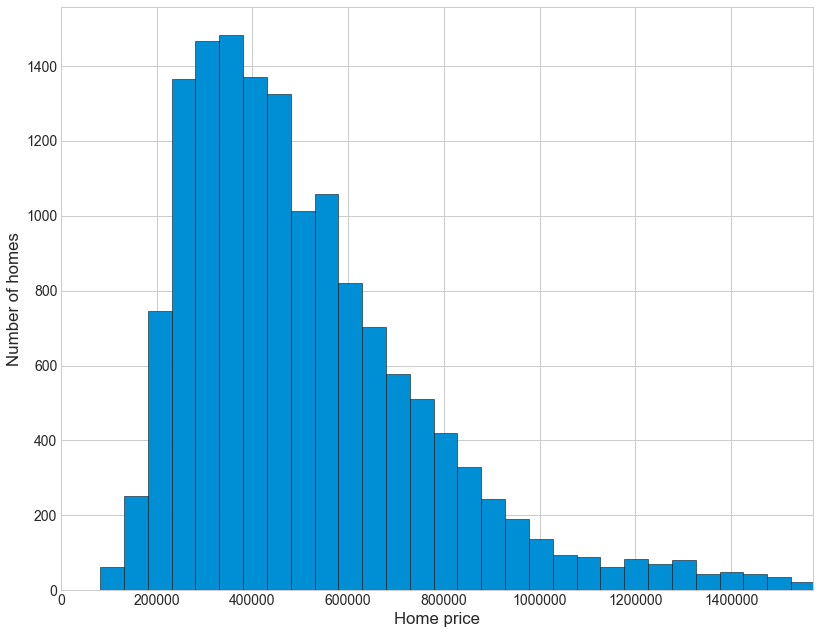

In [156]:
# plt.style('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(12,10))
# ax.set_xlim([0,2000000])
# sns.distplot(df3['log_price'], bins=30, ax=ax, axlabel=r'Home price (log)')
ax.set(xlabel='Home price', ylabel='Number of homes')
ax.set_xlim([0,1570000])
ax.set_xlabel(labelpad=30, fontsize=30)
ax.set_ylabel(labelpad=30, fontsize=30)
plt.hist(df3['price'], bins=30, edgecolor='black', cumulative=False);